<a href="https://colab.research.google.com/github/ronyw7/CFPB-api/blob/main/CFPB_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading and Cleaning Data
Here, I'm requesting data from CFPB's API. This is beneficial if we ever want to download the latest version of data again in the future. I'm also thinking of using a functional approach, where our function takes in the name of the company, product type, and trend interval and then automatically plots the trend.

An alternative way to accomplish the task would be to download the dataset manually at
> https://www.consumerfinance.gov/data-research/consumer-complaints/search/?date_received_max=2023-01-25&date_received_min=2011-12-01&page=1&searchField=all&size=25&sort=created_date_desc&tab=List.




In [ ]:
# importing libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


> A quick proof of concept before delving into the actual tasks



In [ ]:
company = 'BANK OF AMERICA, NATIONAL ASSOCIATION'
product_type = 'Mortgage'
trend_interval = 'month'

# Requesting trend data from CFPB's API, specifying name of the company, type of product, and trend interval
url = 'https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/trends'
response = requests.get(url, params={'company': company, 'lens':'overview', 'product': product_type, 'trend_interval': trend_interval}).json()

# Getting rid of uninteresting items like metadata
response = response['aggregations']['dateRangeBrush']['dateRangeBrush']['buckets']

# Saving to a pandas DataFrame and cleaning the data
df = pd.DataFrame(response).iloc[:, [0, 2]].rename(columns={'key_as_string':'Time', 'doc_count':'Count'})
df["Time"] = pd.to_datetime(df["Time"], format='%y-%m-%d', exact=False)
df

,Time,Count
0,2011-12-01,419
1,2012-01-01,595
2,2012-02-01,642
3,2012-03-01,927
4,2012-04-01,920
...,...,...
129,2022-09-01,74
130,2022-10-01,47
131,2022-11-01,43
132,2022-12-01,42


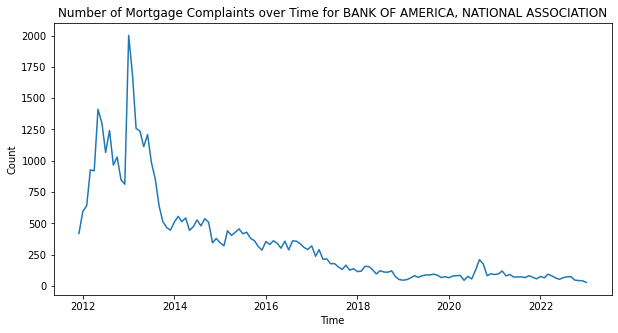

In [ ]:
# Finally, plotting the trend
plt.figure(figsize=(10,5))
plt.title(f"Number of {product_type} Complaints over Time for {company}")
sns.lineplot(data = df, x = 'Time', y = 'Count');

We can easily verify this is the exact same graph as the one available on CFPB's online tool: 
> https://www.consumerfinance.gov/data-research/consumer-complaints/search/?chartType=line&company=BANK%20OF%20AMERICA%2C%20NATIONAL%20ASSOCIATION&dateInterval=Month&date_received_max=2023-01-25&date_received_min=2011-12-01&lens=Product&product=Mortgage&searchField=all&subLens=sub_product&tab=Trends.




# Plotting the Graphs

In [ ]:
def complaints_trend_plot(company, product_type, trend_interval):
  """
  Parameters:
  company: The complaint is about this company.
  product_type: The type of product and sub-product the consumer identified in the complaint.
  trend_interval: Either "year", "quarter", "month", "week", or "day".

  This function takes in the name of the company, product type, and trend interval, and plots the trend of number of complaints
  the company received regarding the specific product type.
  """
  # Requesting trend data from CFPB's API, specifying name of the company, type of product, and trend interval
  url = 'https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/trends'
  response = requests.get(url, params={'company':company, 'lens':'overview', 'product': product_type, 'trend_interval': trend_interval}).json()

  # Getting rid of uninteresting items like metadata
  response = response['aggregations']['dateRangeBrush']['dateRangeBrush']['buckets']

  # Saving to a pandas DataFrame and cleaning the data
  df = pd.DataFrame(response).iloc[:, [0, 2]].rename(columns={'key_as_string':'Time', 'doc_count':'Count'})
  df["Time"] = pd.to_datetime(df["Time"], format='%y-%m-%d', exact=False)

  # Plotting the trend
  plt.figure(figsize=(10,5))
  plt.title(f"Number of {product_type} Complaints over Time for {company}")
  sns.lineplot(data = df, x = 'Time', y = 'Count', marker = 'o');
  plt.savefig(f'{company}_{product_type}.png')

In [ ]:
list_of_banks = ["BANK OF AMERICA, NATIONAL ASSOCIATION", "CITIBANK, N.A.", "JPMORGAN CHASE & CO.", "WELLS FARGO & COMPANY"]
list_of_fintech_lenders = ["Rocket Mortgage, LLC", "PENNYMAC LOAN SERVICES, LLC.", "Freedom Mortgage Company", "Home Point Financial Corporation"]
list_of_products = ["Mortgage", "Student loan", "Vehicle loan or lease", "Credit card or prepaid card", "Checking or savings account"]

## Bank of America

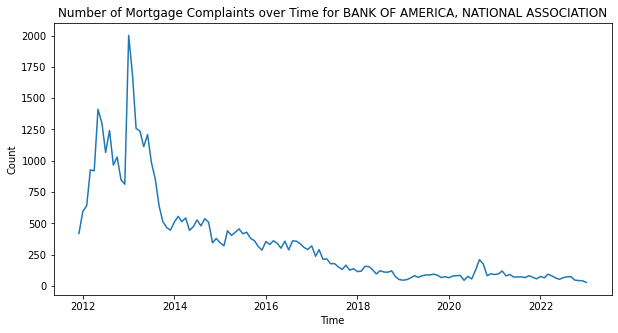

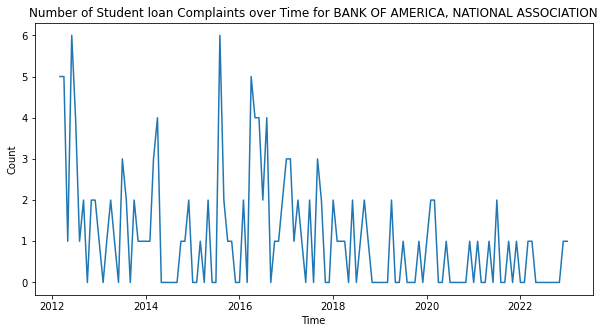

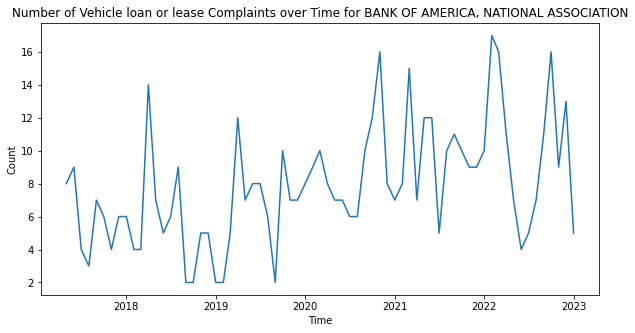

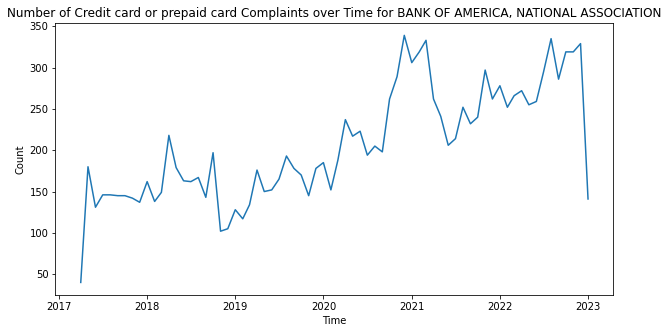

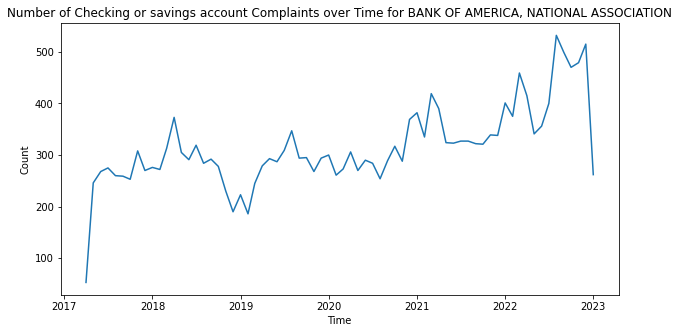

In [ ]:
company = list_of_banks[0]
for product in list_of_products:  
  complaints_trend_plot(company, product, "month")

## Citibank

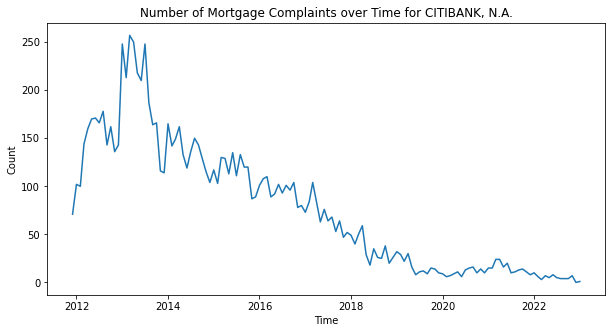

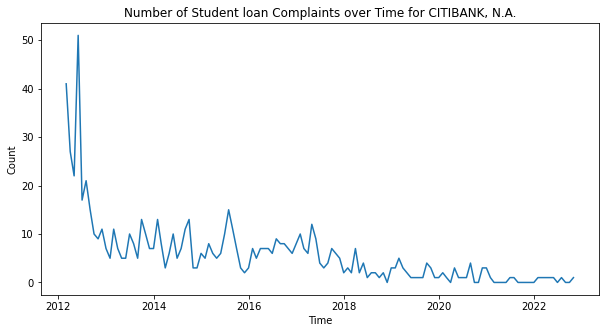

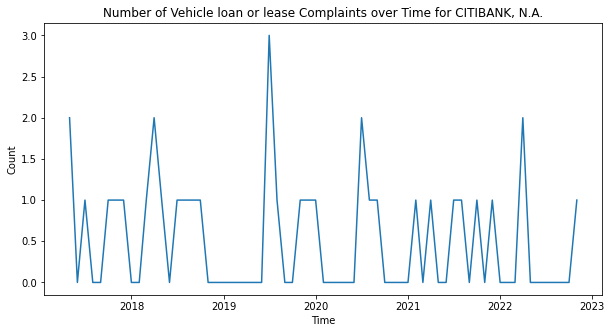

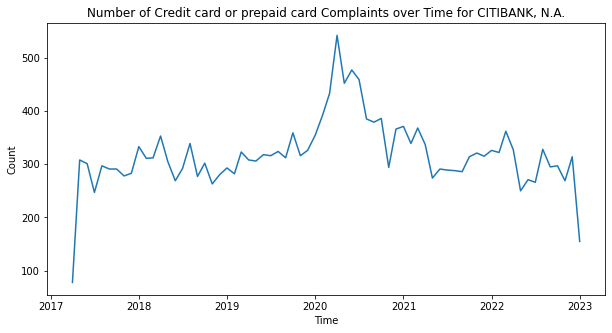

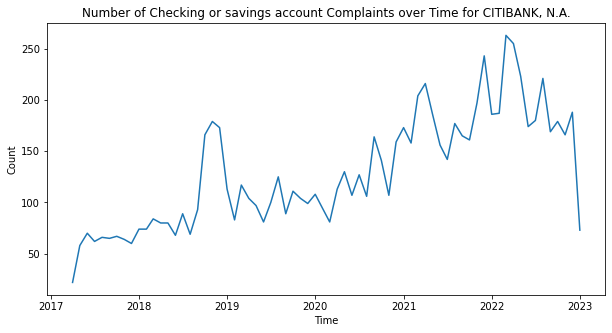

In [ ]:
company = list_of_banks[1]
for product in list_of_products:  
  complaints_trend_plot(company, product, "month")

## JP Morgan Chase

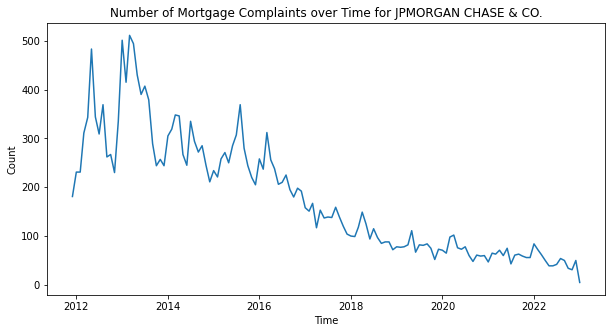

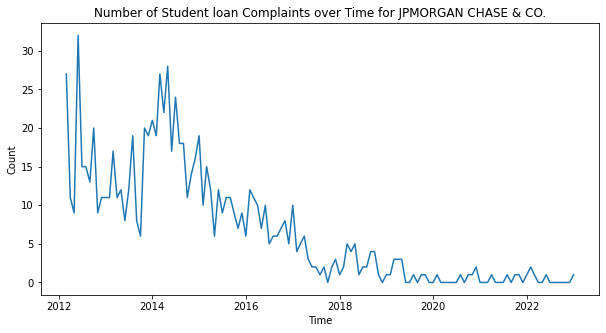

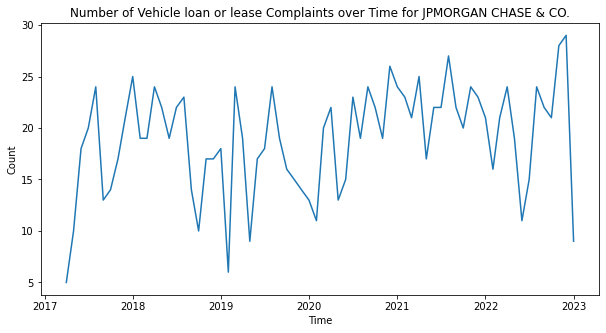

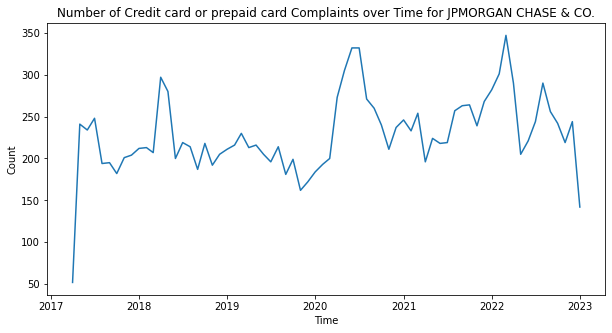

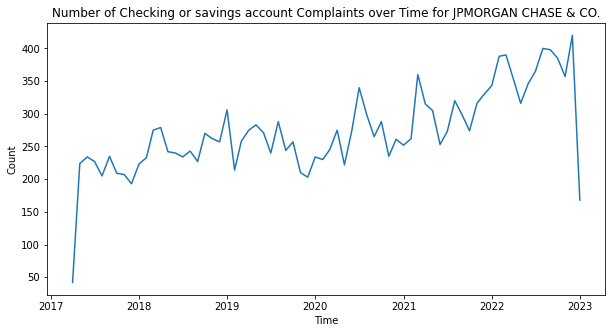

In [ ]:
company = list_of_banks[2]
for product in list_of_products:  
  complaints_trend_plot(company, product, "month")

## Wells Fargo

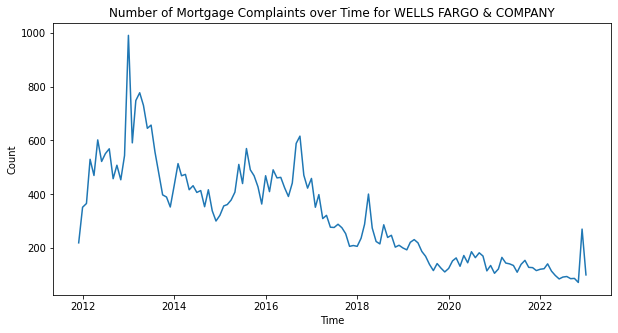

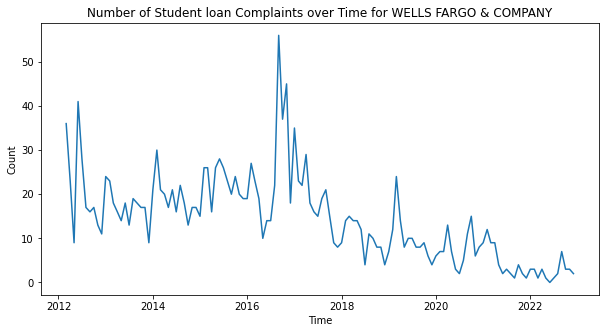

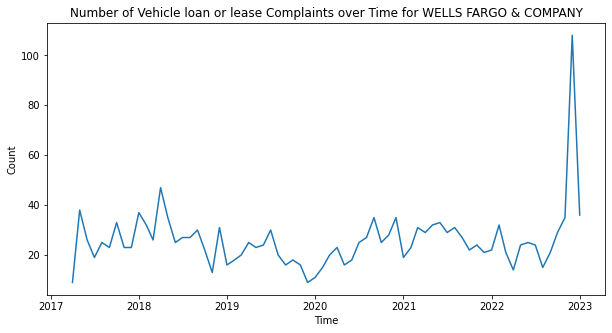

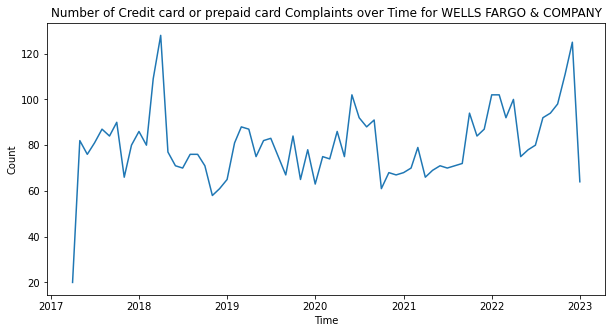

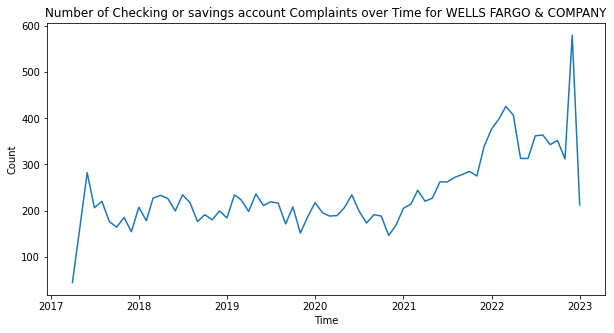

In [ ]:
company = list_of_banks[3]
for product in list_of_products:  
  complaints_trend_plot(company, product, "month")

## Rocket Mortgage, LLC


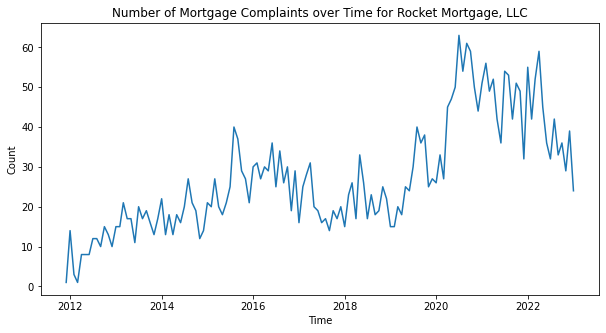

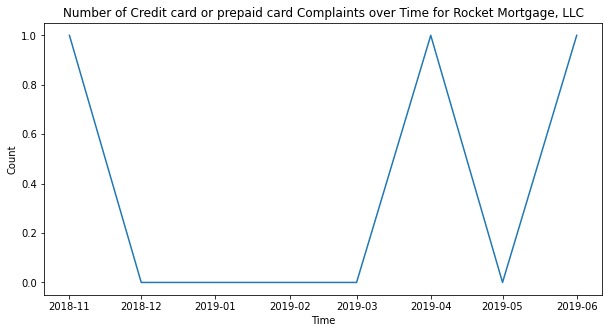

In [ ]:
# This company only offers mortgage and credit card or prepaid card
rocket_mortgage_products = ["Mortgage", "Credit card or prepaid card"]
company = list_of_fintech_lenders[0]
for product in rocket_mortgage_products:  
  complaints_trend_plot(company, product, "month")

## PENNYMAC LOAN SERVICES, LLC.

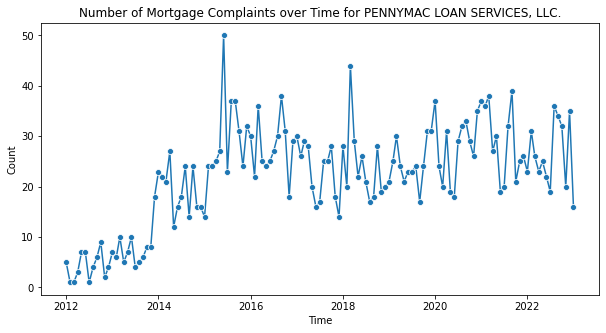

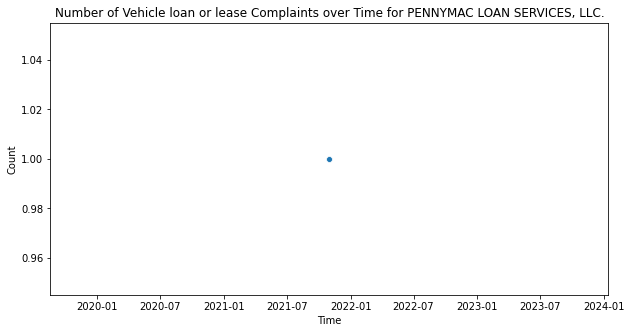

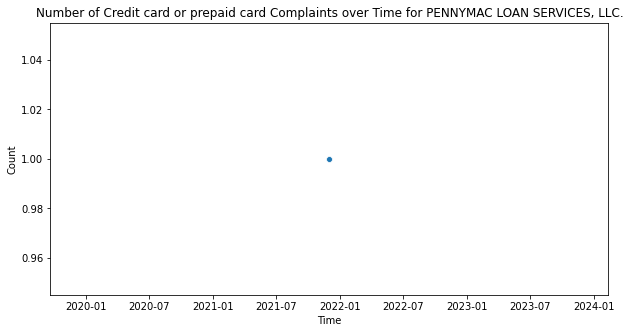

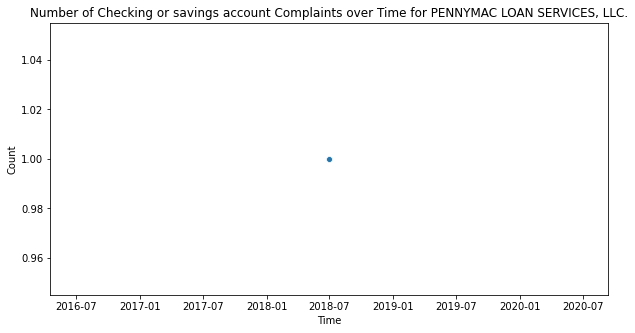

In [ ]:
# Only one datapoint is available for some of the following plots; this is not an error
company = list_of_fintech_lenders[1]
pennymac_products = ["Mortgage", "Vehicle loan or lease", "Credit card or prepaid card", "Checking or savings account"]
for product in pennymac_products:  
  complaints_trend_plot(company, product, "month")

## Freedom Mortgage Company

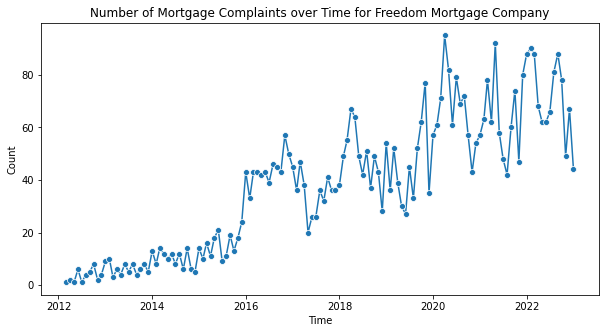

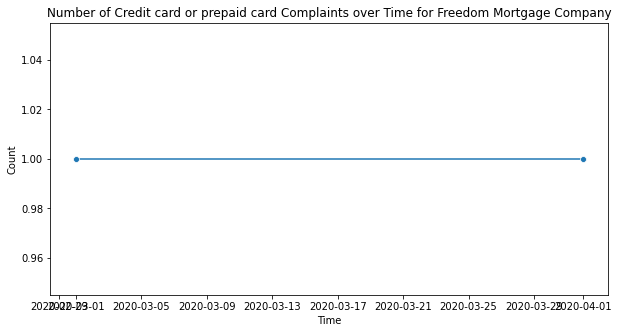

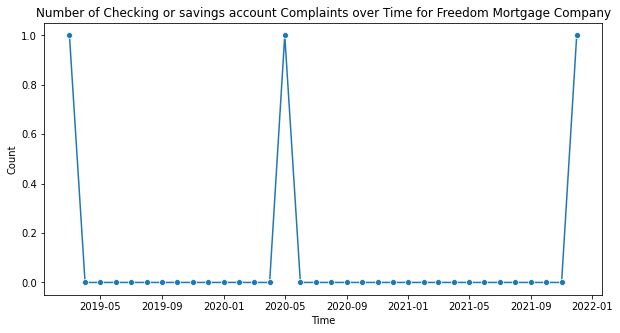

In [ ]:
company = list_of_fintech_lenders[2]
freedom_products = ["Mortgage", "Credit card or prepaid card", "Checking or savings account"]
for product in freedom_products:  
  complaints_trend_plot(company, product, "month")

## Home Point Financial Corporation

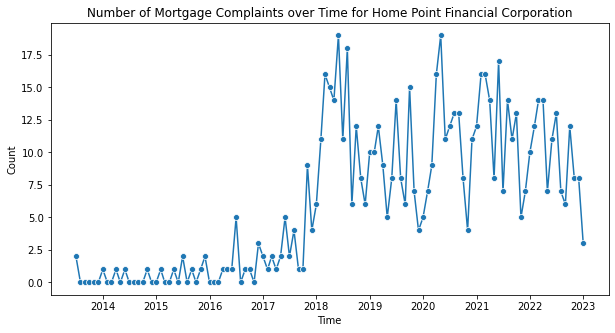

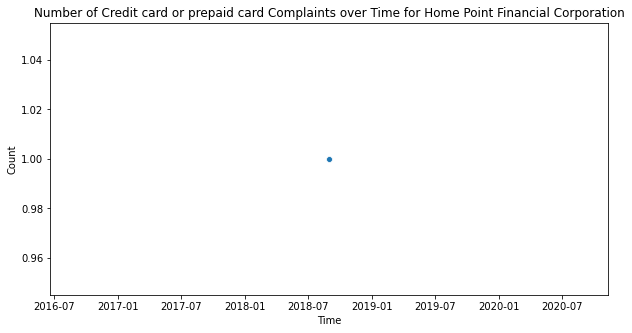

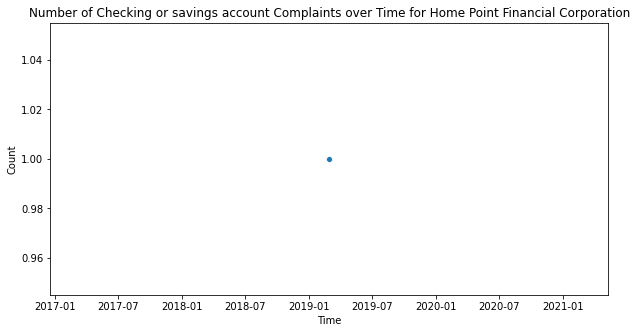

In [ ]:
# This company only offers mortgage and credit card or prepaid card
homepoint_products = ["Mortgage", "Credit card or prepaid card", "Checking or savings account"]
company = list_of_fintech_lenders[3]
for product in homepoint_products:  
  complaints_trend_plot(company, product, "month")

# Summary

In the code cells above, we plotted the trend of the number of complaints a specific bank or fintech lender received regarding a specific product type over time. To summarize the findings, let's take a look at the trend of each product.

Mortgages
> The trends of complaints regarding mortgages across the four major banks were similar. There was a sharp increase in the number of complaints from 2011 (when the data was first made available) through the beginning of 2013, at which point it started to decline steadily.

> As for fintech lenders, the trends were different in that we actually saw an increase in the number of complaints against mortgages over time. The numbers seem to fluctuate a lot in recent years.

> My hypothesis is that after the '08 crisis, banks' share of mortgages declined and non-banks' share generally increased. With an increased share of the mortgage market, there might be more complaints for the fintech lenders.

Student Loans
> Student loan complaints against BofA, Citi, and Chase were generally on the decline over the years, with Bank of America receiving the least number of complaints. One noticeable trend was that there was a spike in the number of complaints received by Wells in September 2016. A quick Google search revealed that during the same month (early September), Wells was fined $185 million for its cross-selling scandal.

> None of the fintech lenders received complaints about student loans.

Vehicle Loans
> Citibank received very few complaints regarding its vehicle loans over the years so the trend is uninteresting. BofA saw some fluctuations but the numbers were generally rising. Chase and Wells Fargo generally receive more complaints than Citi/BofA. Both Chase and Wells had spikes in the numbers of complaints in December 2022.
> Among the fintech lenders, only PennyMac Financial Services received a complaint regarding its vehicle loans.

Credit card or prepaid card
> Again, we can observe different spikes for each individual bank, but the general trend is the same across four banks - all of them saw increases in the number of complaints.
> Fintech lenders received very few complaints.

Checking or savings account
> The trend for the four banks was similar as the numbers were steadily increasing. However, there was another spike in the number of complaints received by Wells in December 2022.
> Fintech lenders received very few complaints.

